# Ex 1.
To-Do

# Ex 2


In [1]:
from tkinter import Variable

from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD
import networkx as nx

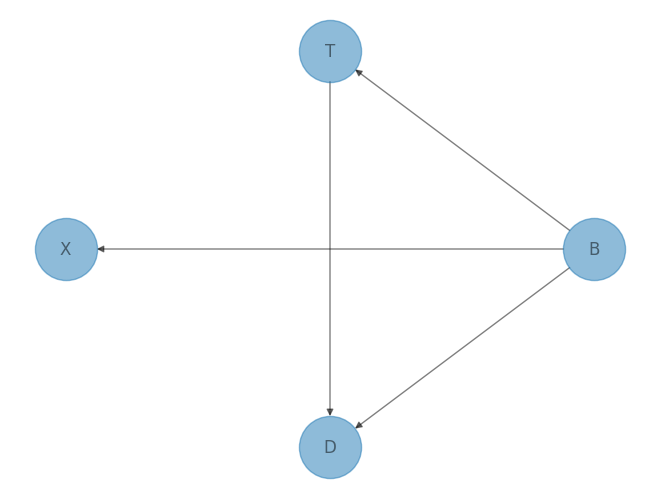

In [10]:
ebola_model = BayesianNetwork([
    ('B','T'),
    ('B','X'),
    ('B','D'),
    ('T','D')
])

coords = nx.circular_layout(ebola_model)
nx.draw(ebola_model, with_labels=True, pos=coords, alpha=0.5, node_size=2000)

In [4]:
CPD_B = TabularCPD(variable='B', 
                   variable_card=2,
                   values=[[0.9],[0.1]])
print(CPD_B)

+------+-----+
| B(0) | 0.9 |
+------+-----+
| B(1) | 0.1 |
+------+-----+


In [6]:
CPD_T = TabularCPD(variable='T',
                   variable_card=2,
                   evidence=['B'],
                   evidence_card=[2],
                   values=[[0.7, 0.2],
                           [0.3, 0.8]])
print(CPD_T)

+------+------+------+
| B    | B(0) | B(1) |
+------+------+------+
| T(0) | 0.7  | 0.2  |
+------+------+------+
| T(1) | 0.3  | 0.8  |
+------+------+------+


In [8]:
CPD_X = TabularCPD(variable='X',
                   variable_card=2,
                   evidence=['B'],
                   evidence_card=[2],
                   values=[[0.9, 0.1],
                           [0.1, 0.9]])
print(CPD_X)

+------+------+------+
| B    | B(0) | B(1) |
+------+------+------+
| X(0) | 0.9  | 0.1  |
+------+------+------+
| X(1) | 0.1  | 0.9  |
+------+------+------+


In [9]:
CPD_D = TabularCPD(variable='D',
                   variable_card=2,
                   evidence=['B','T'],
                   evidence_card=[2,2],
                   values=[[0.9, 0.5, 0.6, 0.1],
                           [0.1, 0.5, 0.4, 0.9]])
print(CPD_D)

+------+------+------+------+------+
| B    | B(0) | B(0) | B(1) | B(1) |
+------+------+------+------+------+
| T    | T(0) | T(1) | T(0) | T(1) |
+------+------+------+------+------+
| D(0) | 0.9  | 0.5  | 0.6  | 0.1  |
+------+------+------+------+------+
| D(1) | 0.1  | 0.5  | 0.4  | 0.9  |
+------+------+------+------+------+


In [13]:
ebola_model.add_cpds(CPD_B,CPD_T,CPD_X,CPD_D)

In [ ]:
ebola_model.get_cpds()

Calculăm acum șansa de a avea boala pulmonară considerând că am observat tuse și dificultăți de respirație

In [17]:
from pgmpy.inference import VariableElimination

infer = VariableElimination(ebola_model)
post_p = infer.query(['B'], evidence = {'T':1,'D':1})
print(post_p)

+------+----------+
| B    |   phi(B) |
+======+==========+
| B(0) |   0.6522 |
+------+----------+
| B(1) |   0.3478 |
+------+----------+


Observăm după ca pacientul nu avea ebola. Facem o nouă inferență pentru a afla dacă radiografia a fost sau nu abnormala

In [39]:
post_p_2 = infer.query(['X'], evidence = {'B':0})
print(post_p_2)

+------+----------+
| X    |   phi(X) |
+======+==========+
| X(0) |   0.9000 |
+------+----------+
| X(1) |   0.1000 |
+------+----------+
